In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/bitcoin-daily/BTC-USD (3).csv")

# Display the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [2]:
# Display the shape of the dataset
print("Number of rows and columns:", data.shape)


Number of rows and columns: (3389, 7)


In [3]:
# Display the data types of each column
print("Data types of each column:\n", data.dtypes)


Data types of each column:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the number of missing values in each column
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Display summary statistics of numerical columns
print("Summary statistics:\n", data.describe())


Summary statistics:
                Open          High           Low         Close     Adj Close  \
count   3389.000000   3389.000000   3389.000000   3389.000000   3389.000000   
mean   14539.016915  14879.356951  14172.744068  14550.240833  14550.240833   
std    16167.796675  16556.473913  15732.459300  16170.397339  16170.397339   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      909.372986    923.418030    895.534973    911.198975    911.198975   
50%     8230.898438   8390.208984   8029.642090   8230.923828   8230.923828   
75%    23652.070313  24167.210938  23177.601563  23723.769531  23723.769531   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  3.389000e+03  
mean   1.654520e+10  
std    1.909523e+10  
min    5.914570e+06  
25%    1.550950e+08  
50%    1.144536e+10  
75%    2.689636e+10  
max    3.509679e+11  


**How is the distribution of the 'Close' prices over time?**

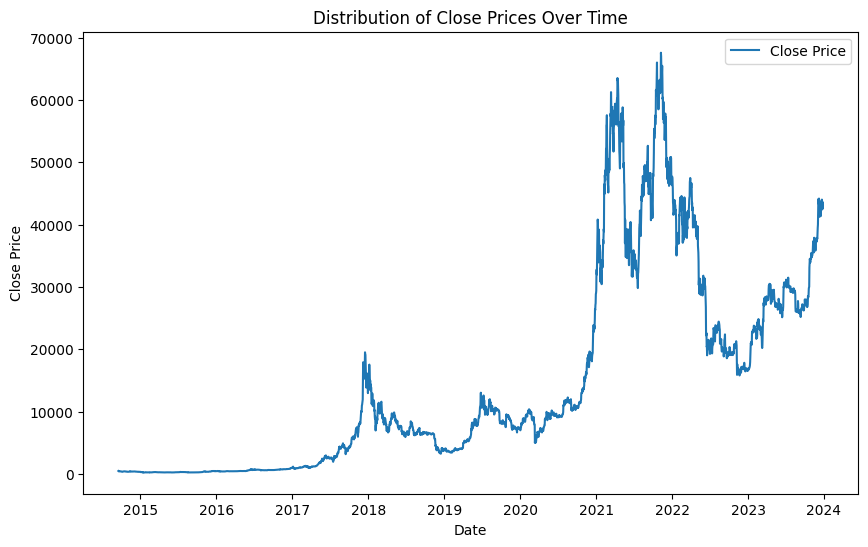

In [6]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the distribution of 'Close' prices over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Distribution of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [7]:
# Extract month and year from 'Date'
data['Month'] = data['Date'].dt.to_period('M')

# Calculate average closing price for each month
average_monthly_close = data.groupby('Month')['Close'].mean()

# Display average closing price for each month
print("Average closing price for each month:\n", average_monthly_close)


Average closing price for each month:
 Month
2014-09      407.182428
2014-10      364.148873
2014-11      366.099799
2014-12      341.267871
2015-01      248.782547
               ...     
2023-08    27852.792843
2023-09    26306.136393
2023-10    29755.895161
2023-11    36596.164844
2023-12    42568.333334
Freq: M, Name: Close, Length: 112, dtype: float64


**What does the overall trend of 'Close' prices look like over the entire time period?**

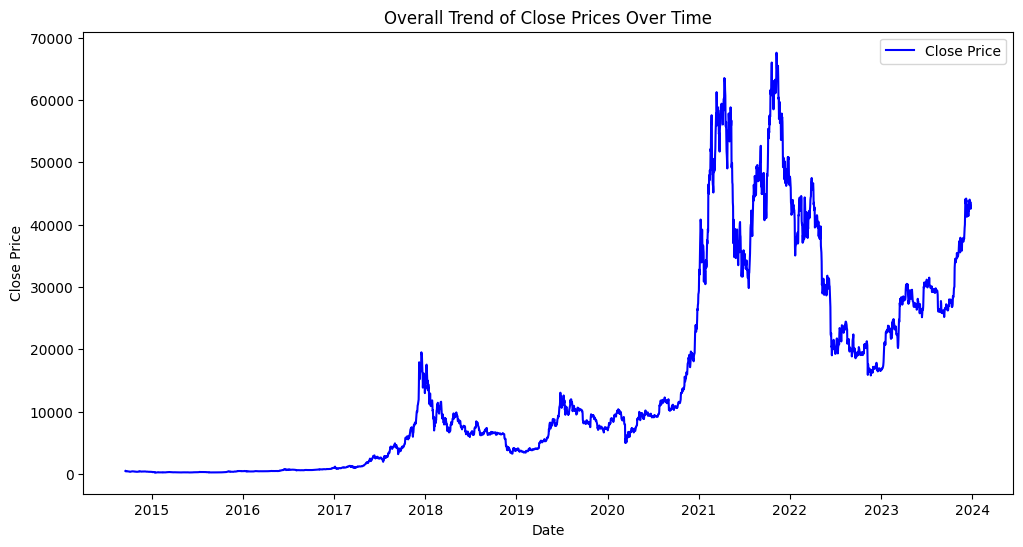

In [8]:
import matplotlib.pyplot as plt

# Plot the overall trend of 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Overall Trend of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Can we visualize the daily price volatility using a candlestick chart for a specific period?**

In [9]:
import plotly.graph_objects as go

# Select a specific period for candlestick chart
start_date = '2015-01-01'
end_date = '2016-01-01'
selected_data = data[(data['Date'] >= start_date) & (data['Date'] < end_date)]

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=selected_data['Date'],
                open=selected_data['Open'],
                high=selected_data['High'],
                low=selected_data['Low'],
                close=selected_data['Close'])])

fig.update_layout(title='Candlestick Chart for Daily Price Volatility',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()


**How does the trading volume vary over time?**

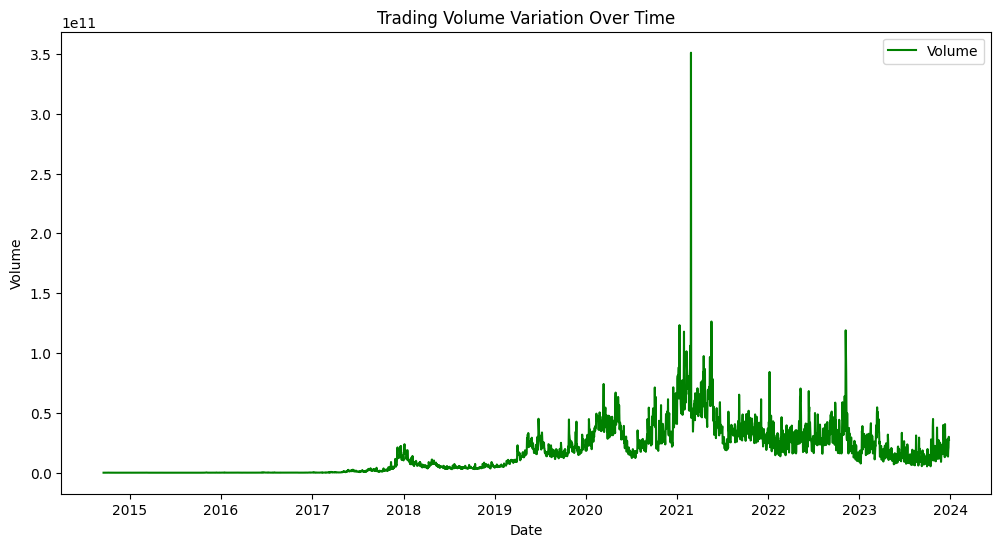

In [10]:
import seaborn as sns

# Plot the variation of trading volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=data, label='Volume', color='green')
plt.title('Trading Volume Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


**Can we create pair plots to visualize relationships between numerical columns?**

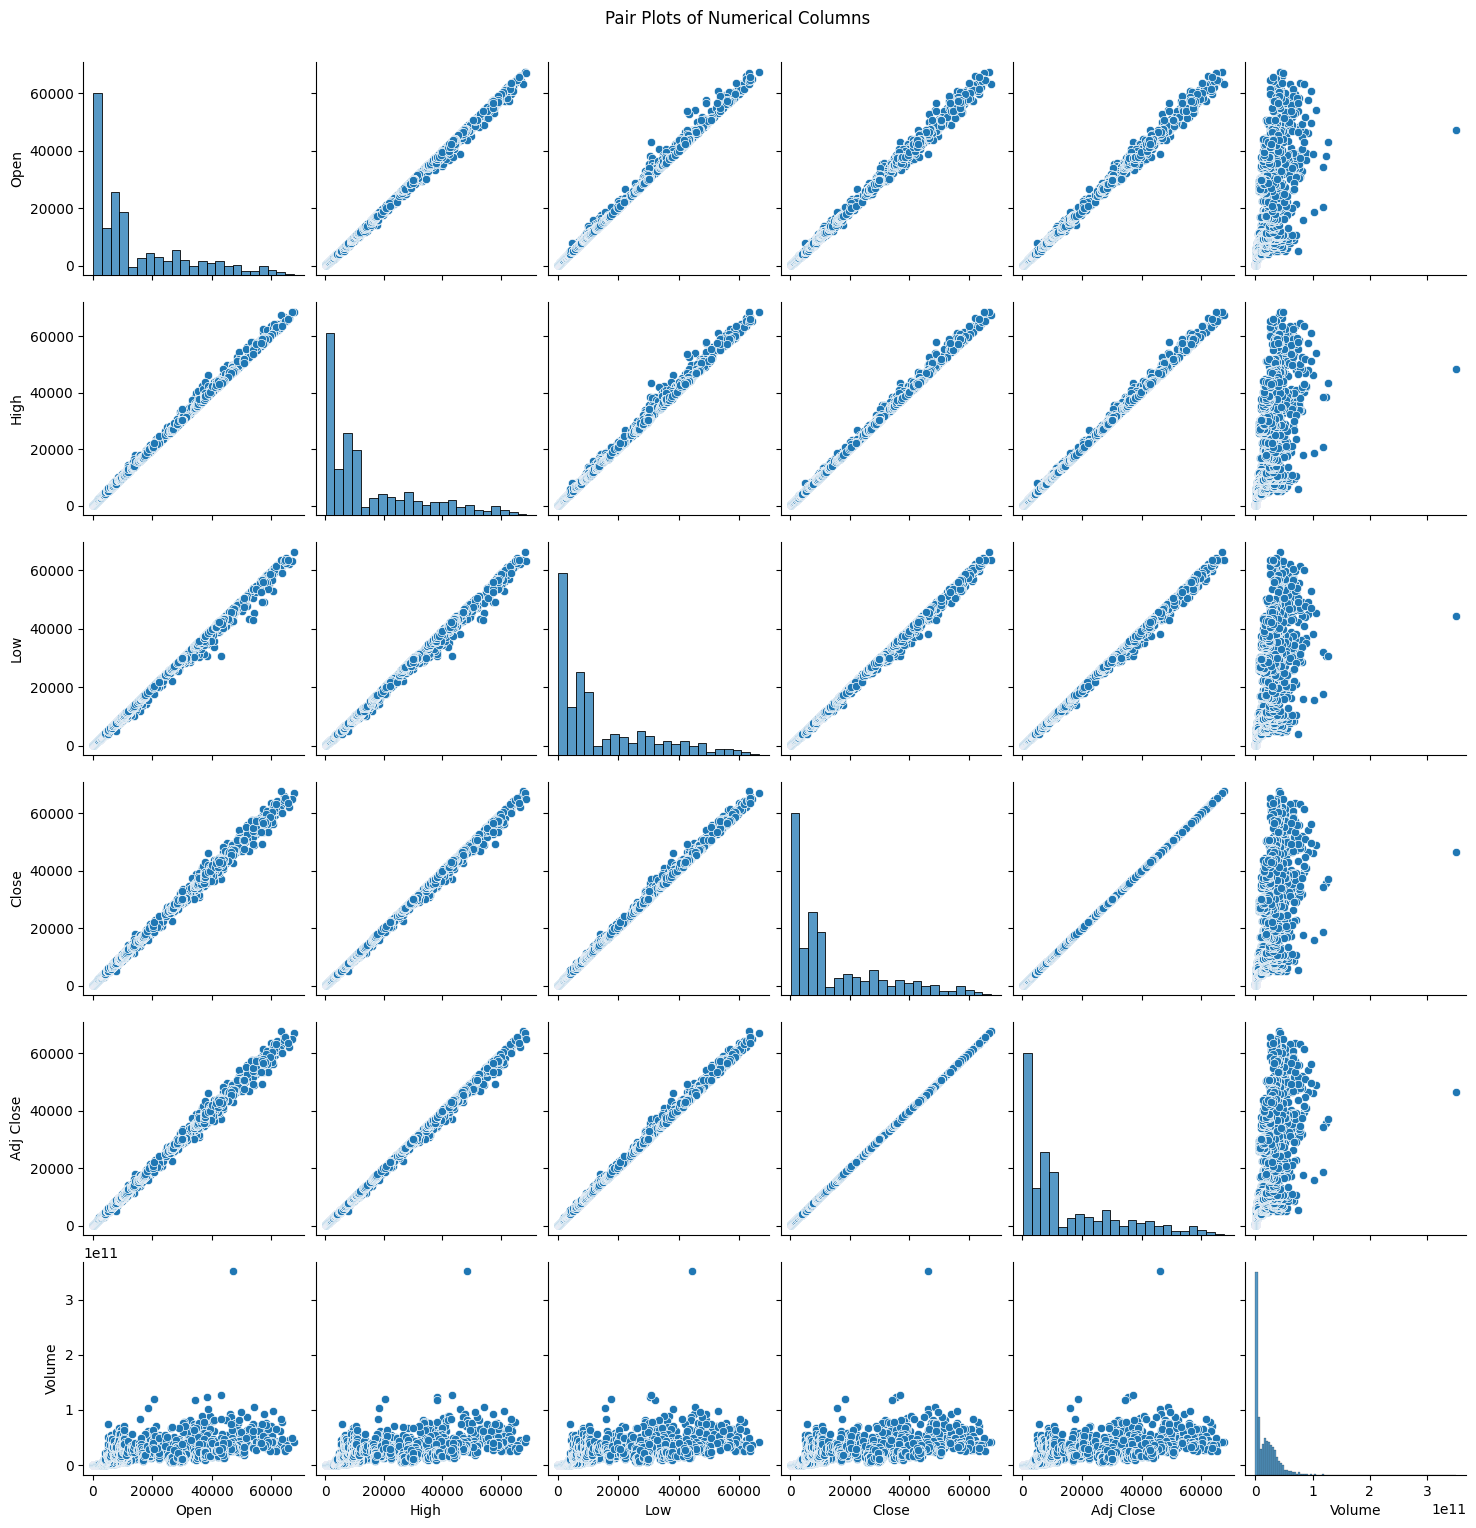

In [11]:
import seaborn as sns

# Select relevant numerical columns
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create pair plots to visualize relationships
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plots of Numerical Columns', y=1.02)
plt.show()


**Can we create pair plots with different colors based on the 'Close' price?**

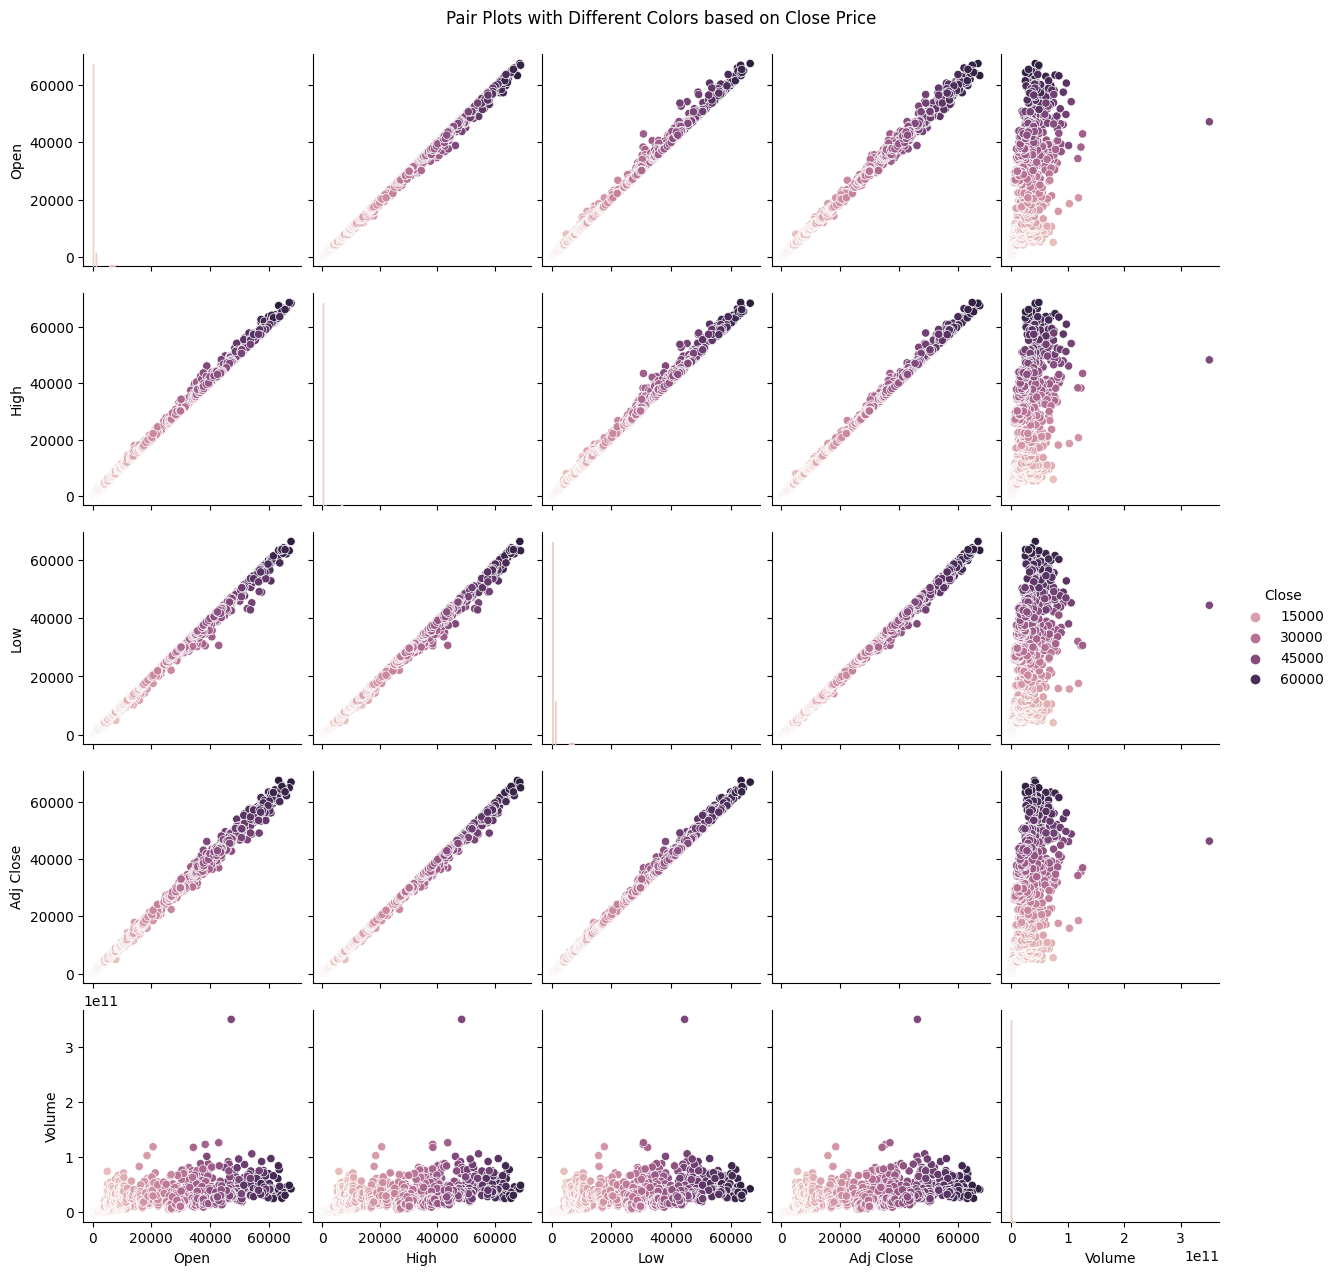

In [12]:
import seaborn as sns

# Create pair plots with different colors based on 'Close' price
sns.pairplot(data, hue='Close')
plt.suptitle('Pair Plots with Different Colors based on Close Price', y=1.02)
plt.show()


**How do the pair plots look when considering a specific time period?**

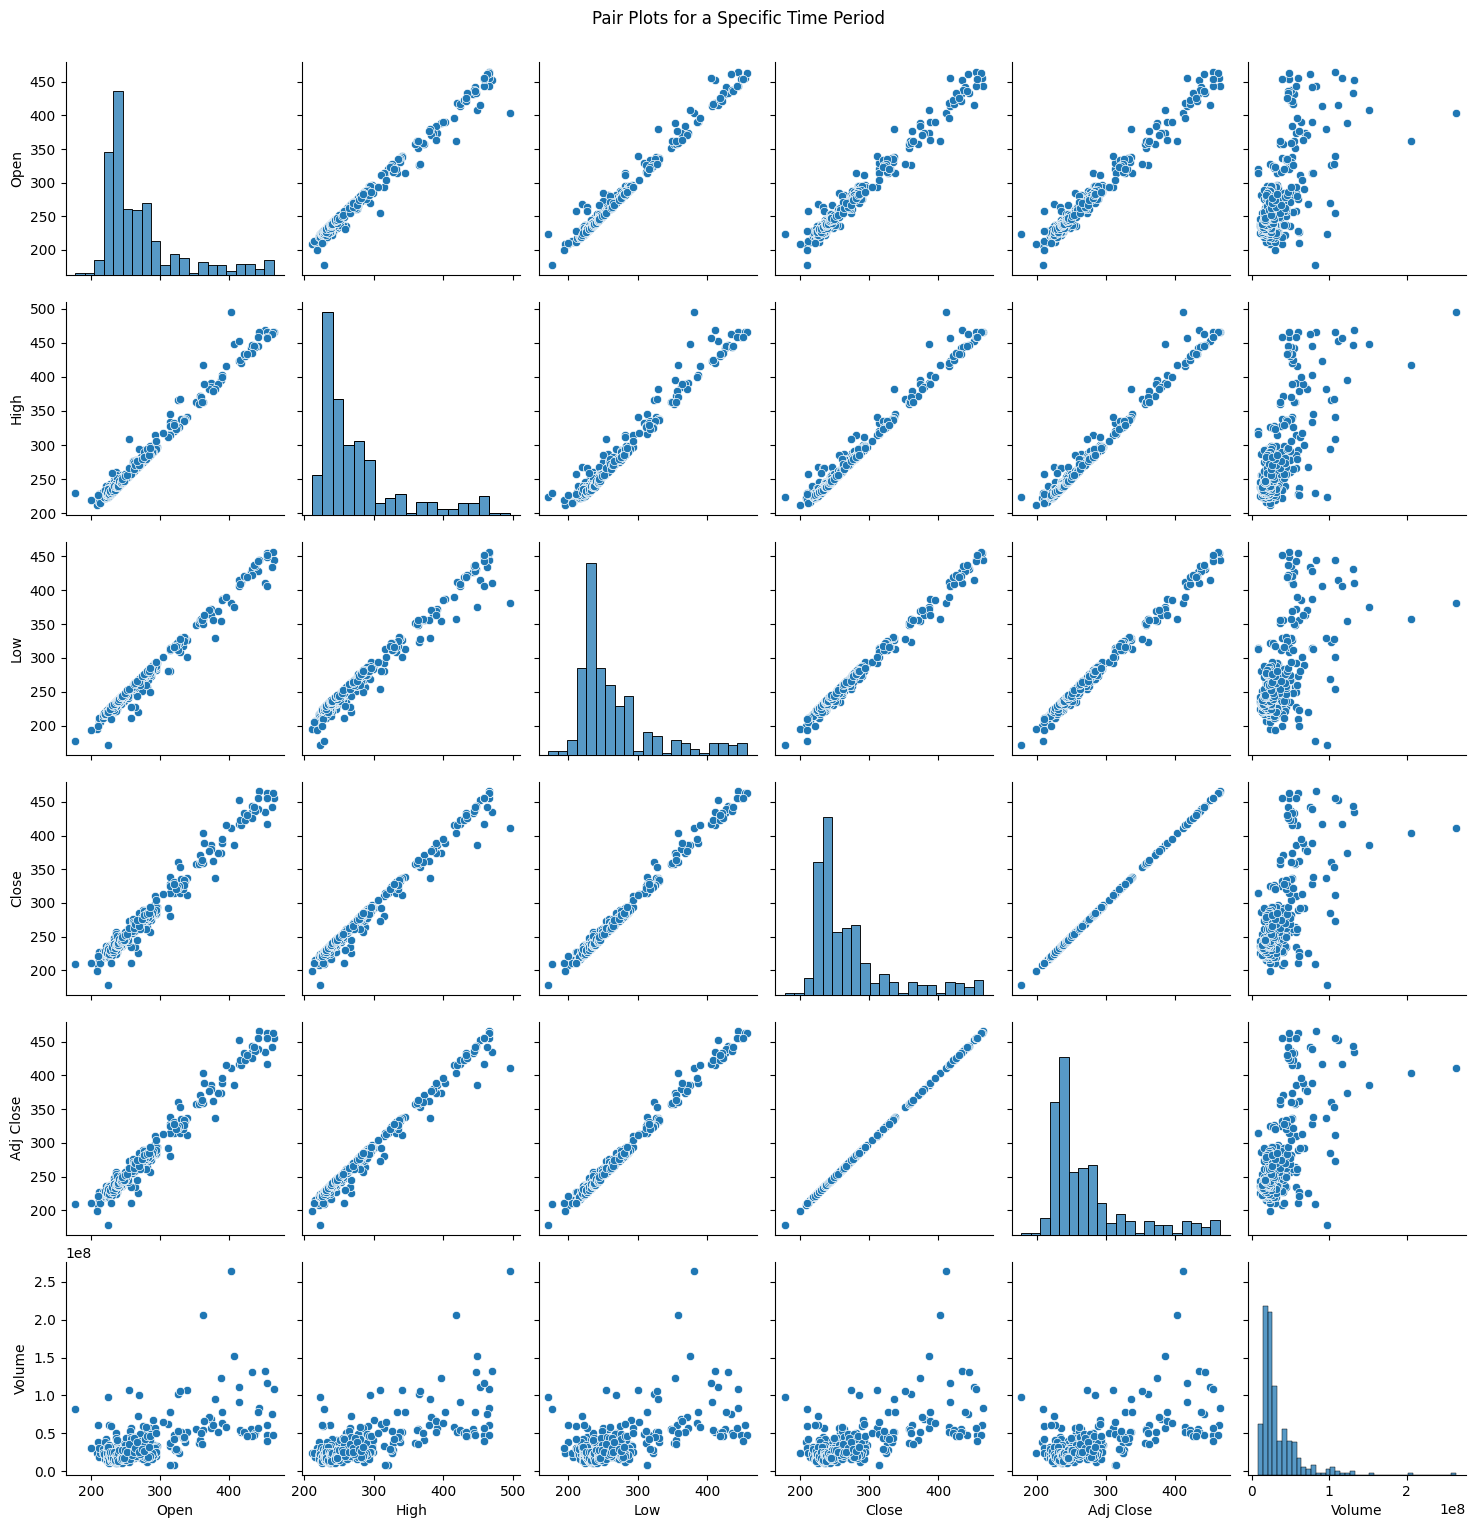

In [13]:
import seaborn as sns

# Select a specific time period for pair plots
start_date = '2015-01-01'
end_date = '2016-01-01'
selected_data = data[(data['Date'] >= start_date) & (data['Date'] < end_date)]

# Create pair plots for the selected time period
sns.pairplot(selected_data[numerical_columns])
plt.suptitle('Pair Plots for a Specific Time Period', y=1.02)
plt.show()


**How does the 'High' price vary with the 'Low' price?**

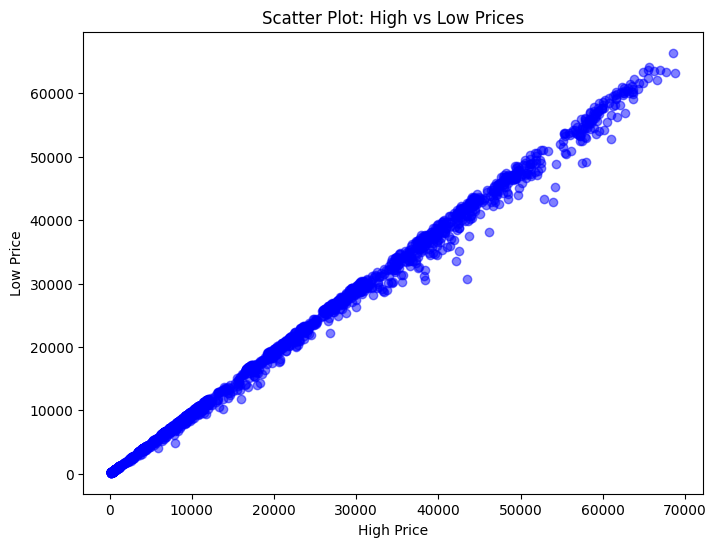

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for 'High' vs 'Low' prices
plt.figure(figsize=(8, 6))
plt.scatter(data['High'], data['Low'], color='blue', alpha=0.5)
plt.title('Scatter Plot: High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()


**Can we visualize the correlation between 'Volume' and 'Close' prices using a scatter plot?**

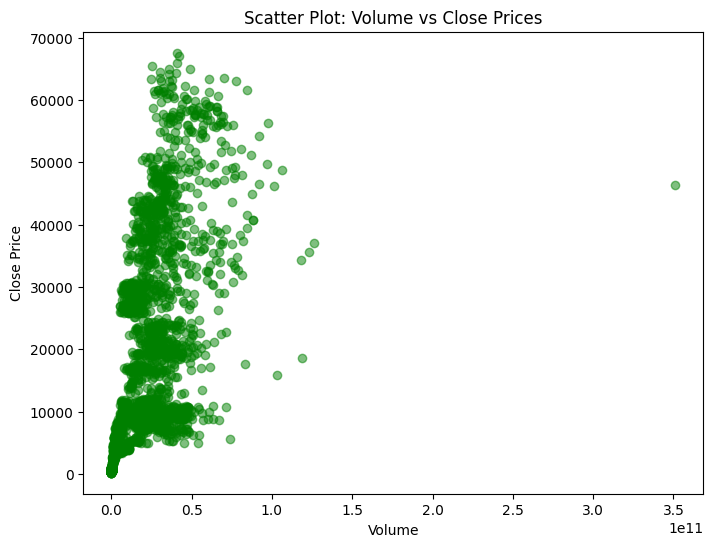

In [15]:
import matplotlib.pyplot as plt

# Scatter plot for 'Volume' vs 'Close' prices
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['Close'], color='green', alpha=0.5)
plt.title('Scatter Plot: Volume vs Close Prices')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


**How is the 'Close' price related to 'Adj Close' prices?**

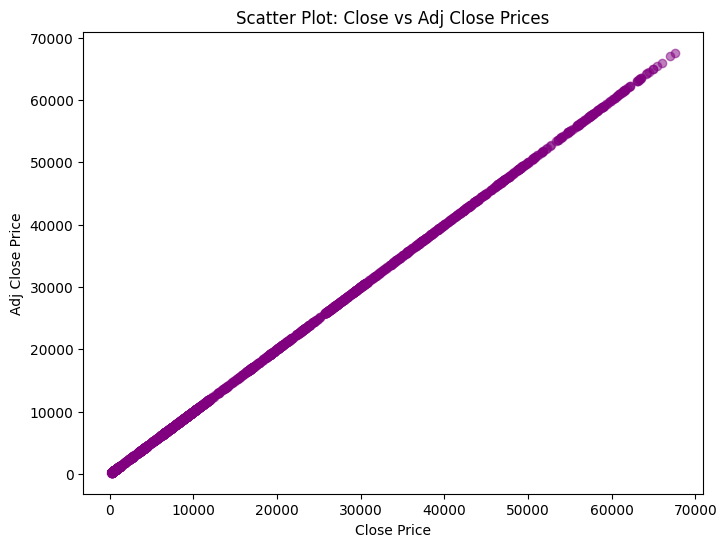

In [16]:
import matplotlib.pyplot as plt

# Scatter plot for 'Close' vs 'Adj Close' prices
plt.figure(figsize=(8, 6))
plt.scatter(data['Close'], data['Adj Close'], color='purple', alpha=0.5)
plt.title('Scatter Plot: Close vs Adj Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Adj Close Price')
plt.show()


**How does the 'Open' price vary with the 'Close' price?**

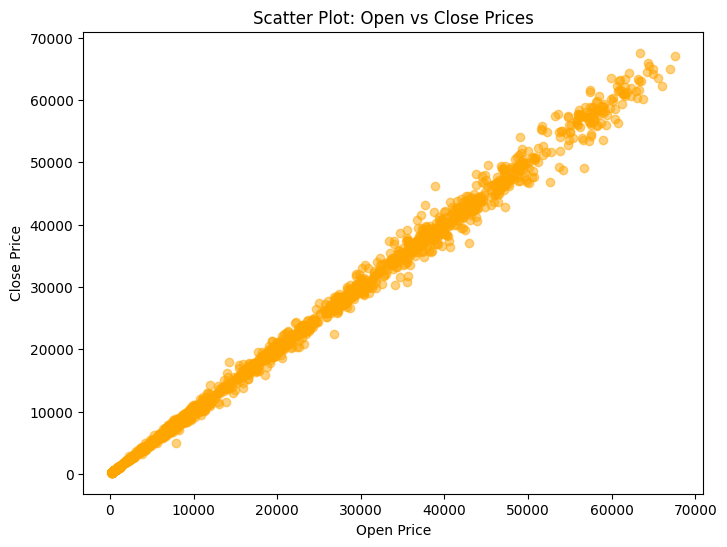

In [17]:
import matplotlib.pyplot as plt

# Scatter plot for 'Open' vs 'Close' prices
plt.figure(figsize=(8, 6))
plt.scatter(data['Open'], data['Close'], color='orange', alpha=0.5)
plt.title('Scatter Plot: Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


**What is the relationship between 'High' prices and trading volume?**

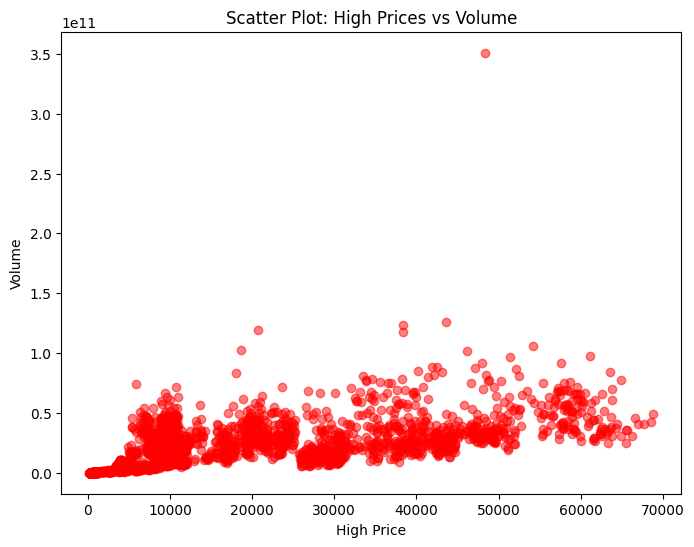

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for 'High' prices vs 'Volume'
plt.figure(figsize=(8, 6))
plt.scatter(data['High'], data['Volume'], color='red', alpha=0.5)
plt.title('Scatter Plot: High Prices vs Volume')
plt.xlabel('High Price')
plt.ylabel('Volume')
plt.show()


**Can we visualize the relationship between 'Low' prices and trading volume?**

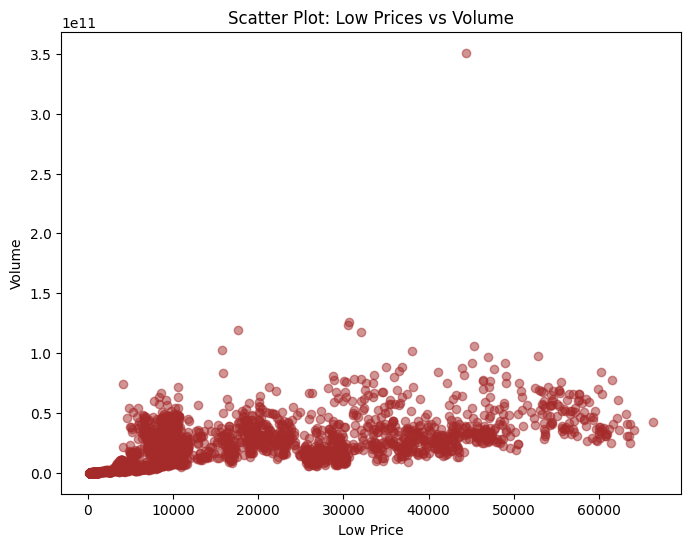

In [19]:
import matplotlib.pyplot as plt

# Scatter plot for 'Low' prices vs 'Volume'
plt.figure(figsize=(8, 6))
plt.scatter(data['Low'], data['Volume'], color='brown', alpha=0.5)
plt.title('Scatter Plot: Low Prices vs Volume')
plt.xlabel('Low Price')
plt.ylabel('Volume')
plt.show()


**How does the 'Open' price relate to trading volume?**

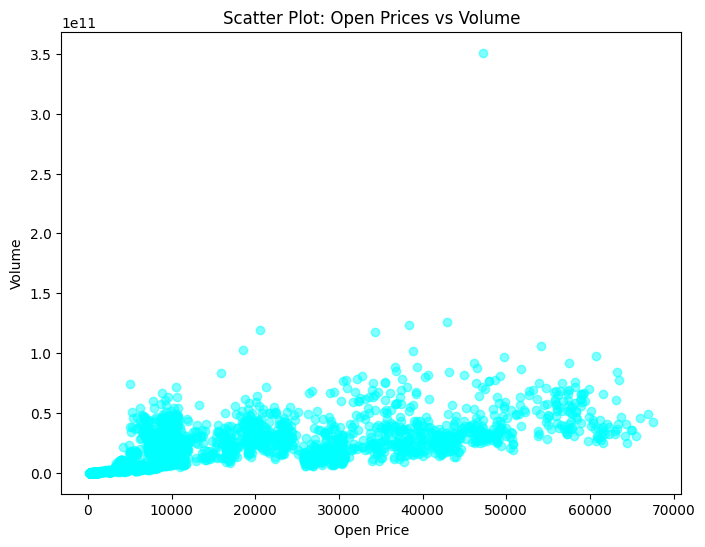

In [20]:
import matplotlib.pyplot as plt

# Scatter plot for 'Open' prices vs 'Volume'
plt.figure(figsize=(8, 6))
plt.scatter(data['Open'], data['Volume'], color='cyan', alpha=0.5)
plt.title('Scatter Plot: Open Prices vs Volume')
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.show()


**What is the relationship between 'Close' prices and trading volume during a specific time period?**

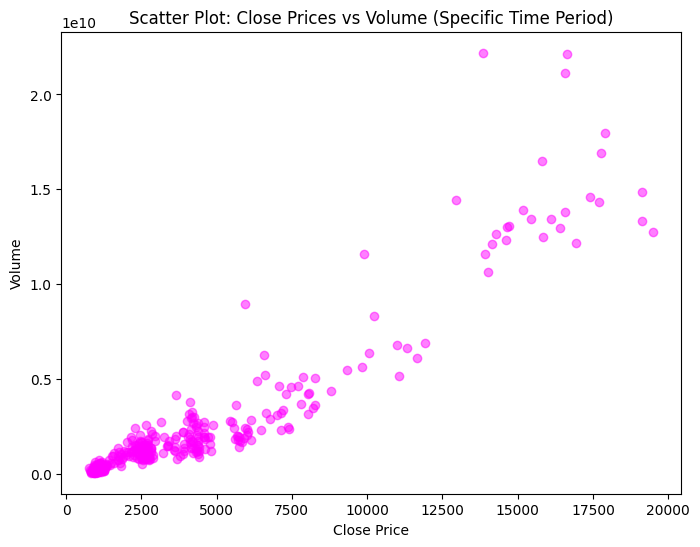

In [21]:
import matplotlib.pyplot as plt

# Select a specific time period for the scatter plot
start_date = '2017-01-01'
end_date = '2018-01-01'
selected_data = data[(data['Date'] >= start_date) & (data['Date'] < end_date)]

# Scatter plot for 'Close' prices vs 'Volume' for the selected time period
plt.figure(figsize=(8, 6))
plt.scatter(selected_data['Close'], selected_data['Volume'], color='magenta', alpha=0.5)
plt.title('Scatter Plot: Close Prices vs Volume (Specific Time Period)')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()


**Can we visualize the relationship between 'Adj Close' prices and trading volume?**

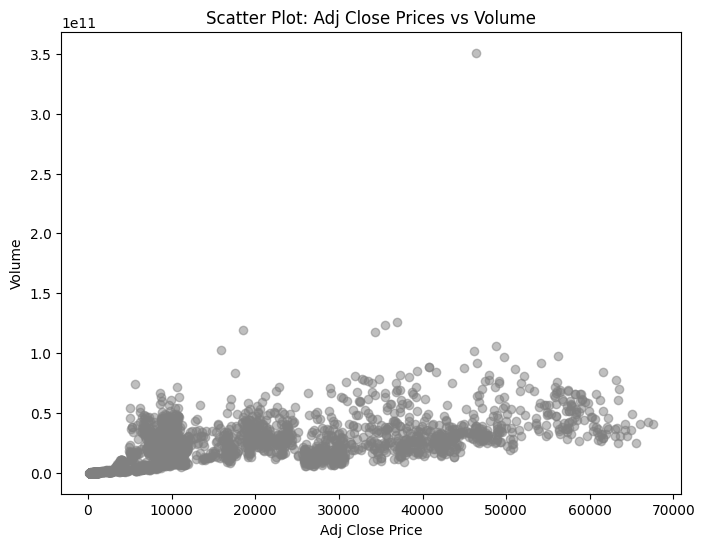

In [22]:
import matplotlib.pyplot as plt

# Scatter plot for 'Adj Close' prices vs 'Volume'
plt.figure(figsize=(8, 6))
plt.scatter(data['Adj Close'], data['Volume'], color='gray', alpha=0.5)
plt.title('Scatter Plot: Adj Close Prices vs Volume')
plt.xlabel('Adj Close Price')
plt.ylabel('Volume')
plt.show()


**Is there a visible relationship between 'Open' prices and 'Volume' for high 'Low' prices?**

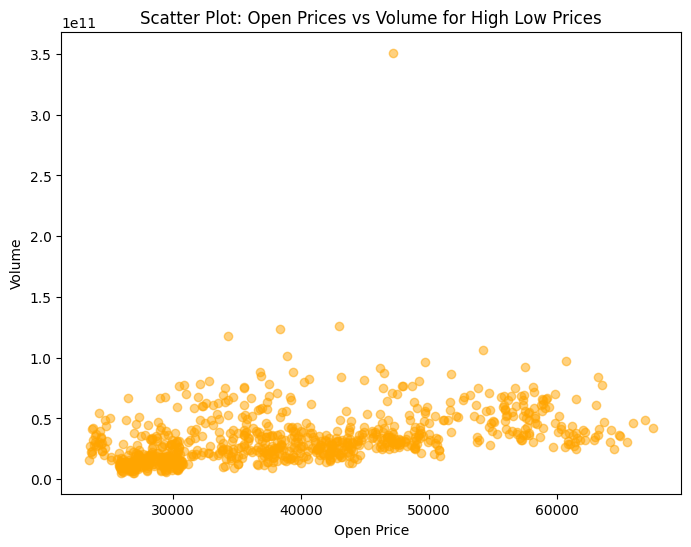

In [23]:
import matplotlib.pyplot as plt

# Filter data for high 'Low' prices
high_low_prices = data[data['Low'] > data['Low'].quantile(0.75)]

# Scatter plot for 'Open' prices vs 'Volume' for high 'Low' prices
plt.figure(figsize=(8, 6))
plt.scatter(high_low_prices['Open'], high_low_prices['Volume'], color='orange', alpha=0.5)
plt.title('Scatter Plot: Open Prices vs Volume for High Low Prices')
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.show()


**Can we visualize how 'High' prices and 'Low' prices vary with 'Volume' during a specific time period?**

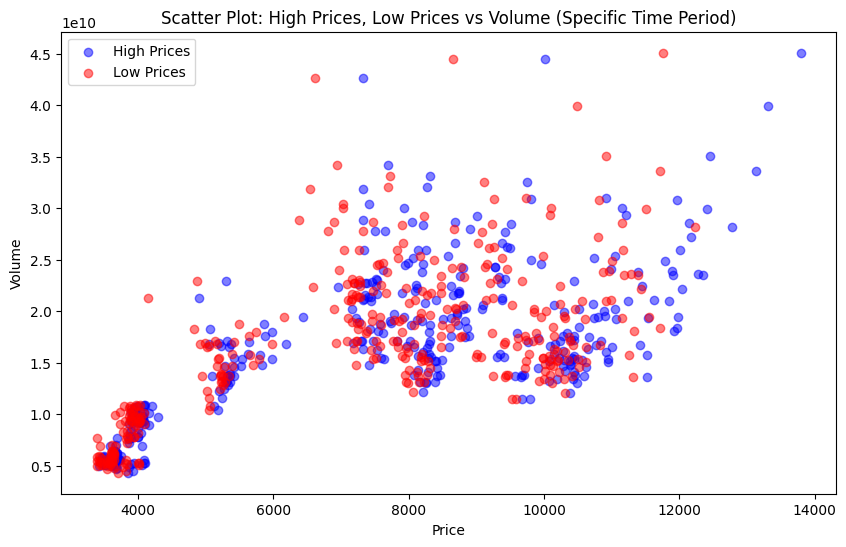

In [24]:
import matplotlib.pyplot as plt

# Select a specific time period for the scatter plot
start_date = '2019-01-01'
end_date = '2020-01-01'
selected_data = data[(data['Date'] >= start_date) & (data['Date'] < end_date)]

# Scatter plot for 'High' prices, 'Low' prices, and 'Volume' for the selected time period
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['High'], selected_data['Volume'], label='High Prices', color='blue', alpha=0.5)
plt.scatter(selected_data['Low'], selected_data['Volume'], label='Low Prices', color='red', alpha=0.5)
plt.title('Scatter Plot: High Prices, Low Prices vs Volume (Specific Time Period)')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.show()


**How does the relationship between 'Open' prices and 'Close' prices vary during different months?**

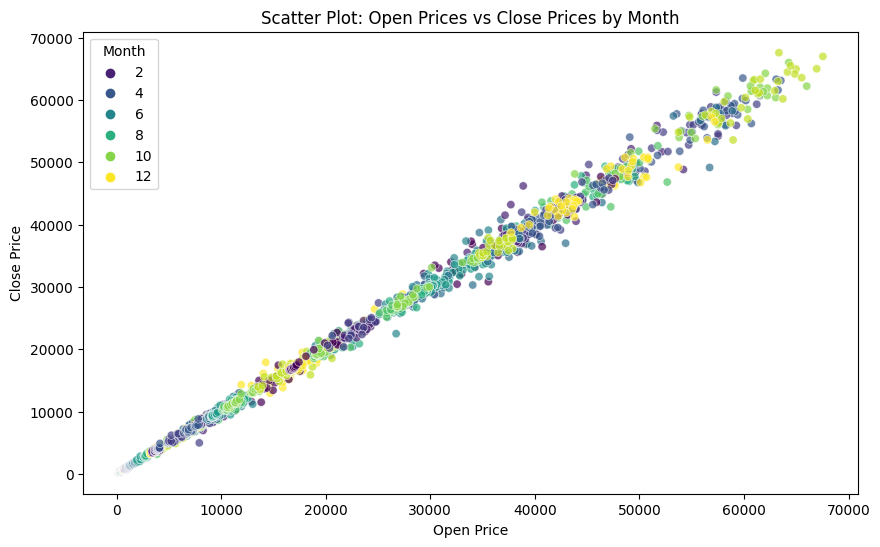

In [25]:
import seaborn as sns

# Extract month and year from 'Date'
data['Month'] = data['Date'].dt.month

# Scatter plot for 'Open' prices vs 'Close' prices, colored by month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', hue='Month', data=data, palette='viridis', alpha=0.7)
plt.title('Scatter Plot: Open Prices vs Close Prices by Month')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


**Can we visualize the relationship between 'Close' prices and 'Volume' during periods of extreme price volatility?**

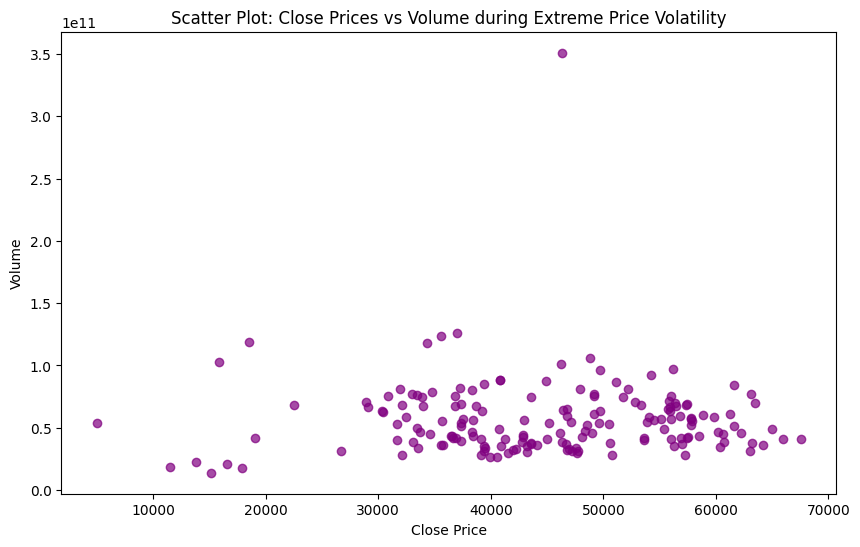

In [26]:
# Define a threshold for extreme price volatility (e.g., top 5% of daily price range)
price_volatility_threshold = data['High'] - data['Low']
extreme_volatility_data = data[price_volatility_threshold > price_volatility_threshold.quantile(0.95)]

# Scatter plot for 'Close' prices vs 'Volume' during periods of extreme price volatility
plt.figure(figsize=(10, 6))
plt.scatter(extreme_volatility_data['Close'], extreme_volatility_data['Volume'], color='purple', alpha=0.7)
plt.title('Scatter Plot: Close Prices vs Volume during Extreme Price Volatility')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()


**How does the 'Close' price evolve over time?**

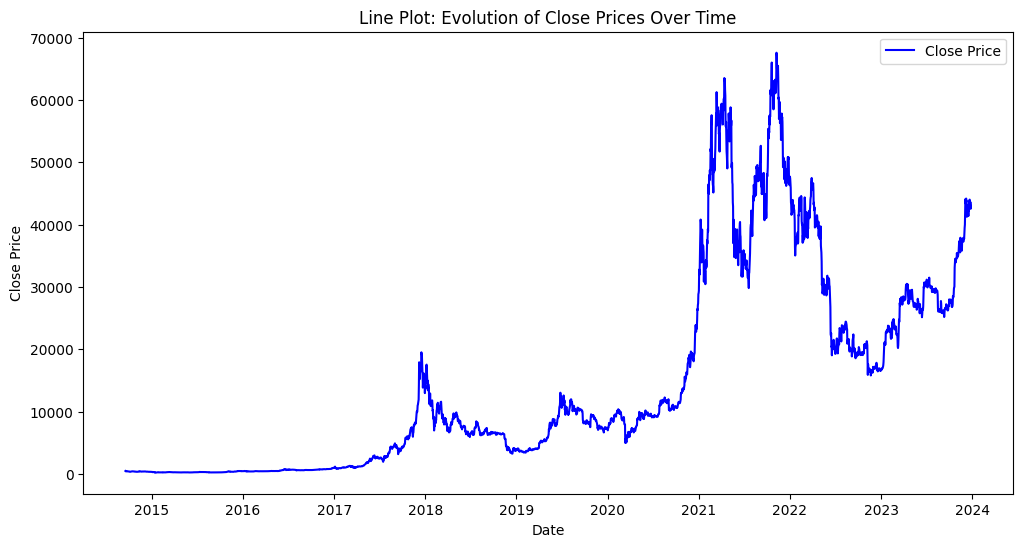

In [27]:
import matplotlib.pyplot as plt

# Line plot for the evolution of 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Line Plot: Evolution of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Can we visualize the trend of 'High' prices over the years?**

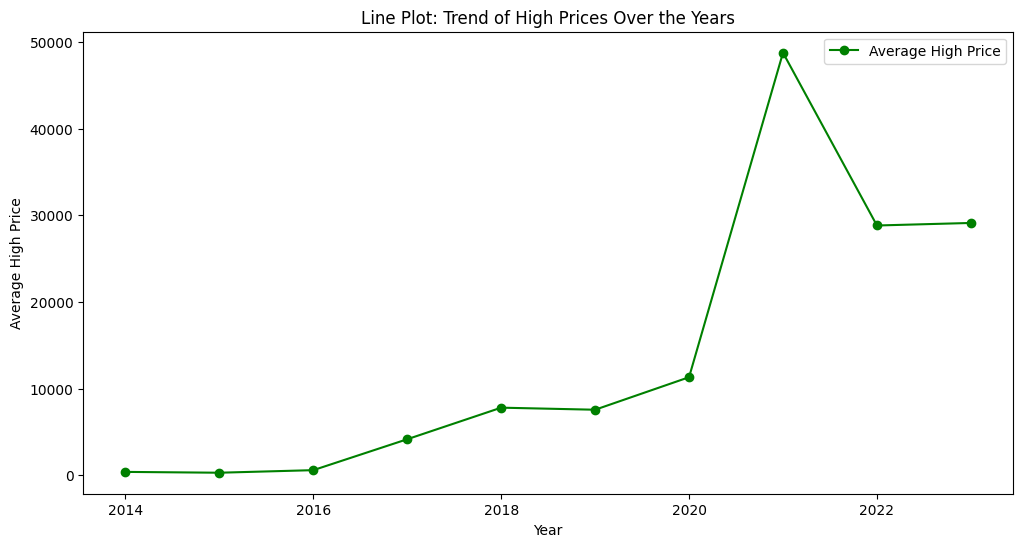

In [28]:
import matplotlib.pyplot as plt

# Extract year from 'Date'
data['Year'] = data['Date'].dt.year

# Line plot for the trend of 'High' prices over the years
plt.figure(figsize=(12, 6))
plt.plot(data.groupby('Year')['High'].mean(), marker='o', linestyle='-', color='green', label='Average High Price')
plt.title('Line Plot: Trend of High Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average High Price')
plt.legend()
plt.show()


**How does the trading volume change over the months?**

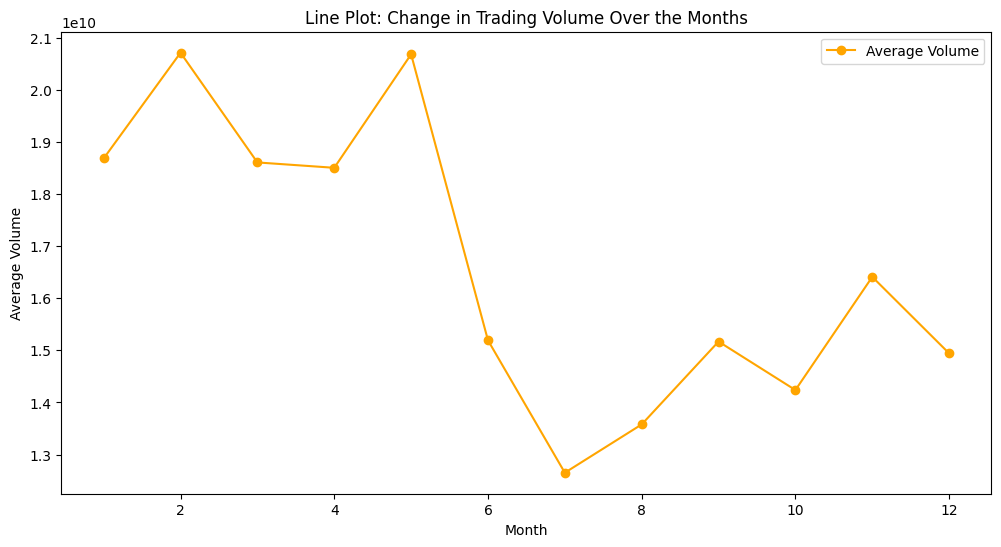

In [29]:
import matplotlib.pyplot as plt

# Line plot for the change in trading volume over the months
plt.figure(figsize=(12, 6))
plt.plot(data.groupby('Month')['Volume'].mean(), marker='o', linestyle='-', color='orange', label='Average Volume')
plt.title('Line Plot: Change in Trading Volume Over the Months')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.legend()
plt.show()


**What is the trend of the 'Open' prices over the months?**

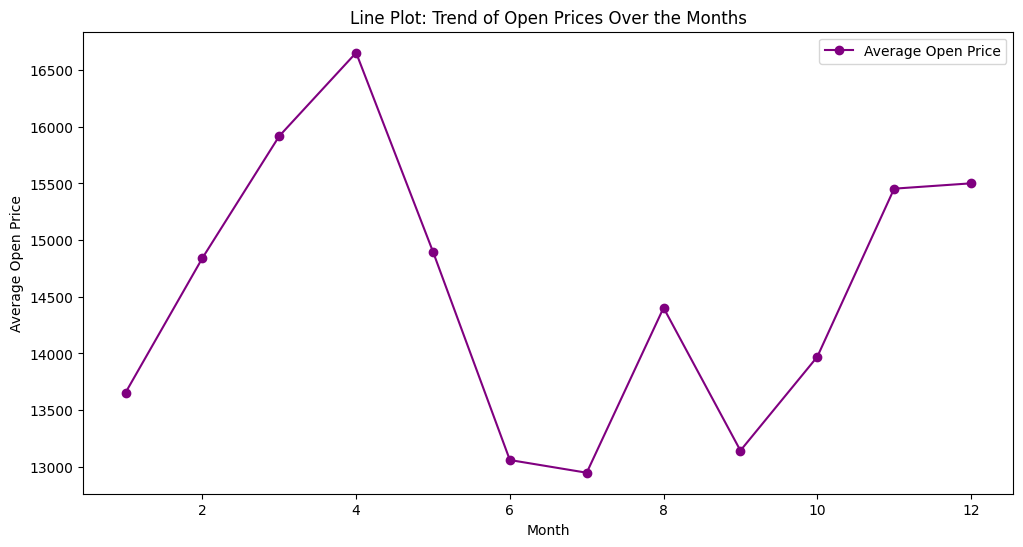

In [30]:
import matplotlib.pyplot as plt

# Line plot for the trend of 'Open' prices over the months
plt.figure(figsize=(12, 6))
plt.plot(data.groupby('Month')['Open'].mean(), marker='o', linestyle='-', color='purple', label='Average Open Price')
plt.title('Line Plot: Trend of Open Prices Over the Months')
plt.xlabel('Month')
plt.ylabel('Average Open Price')
plt.legend()
plt.show()


**How does the 'Low' price change over the years?**

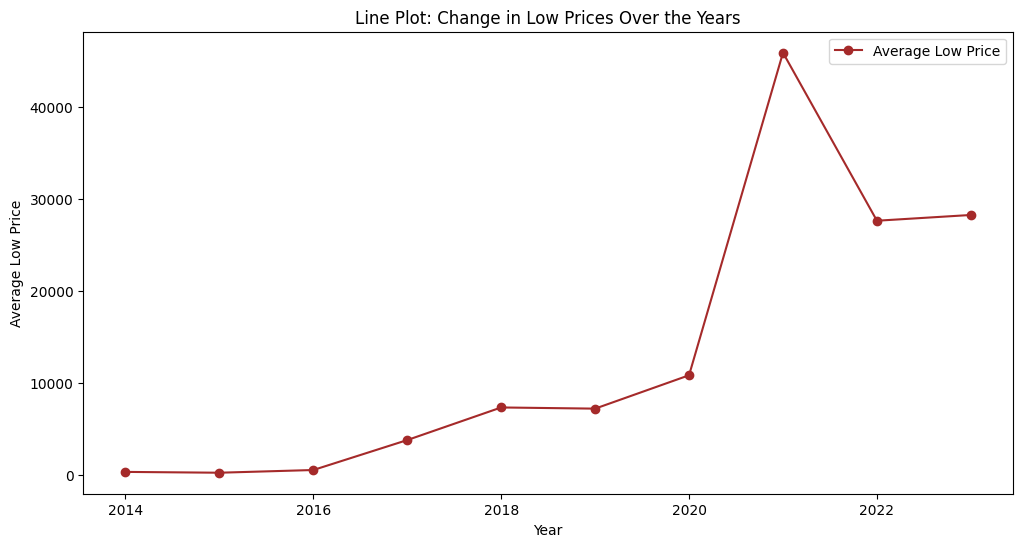

In [31]:
import matplotlib.pyplot as plt

# Line plot for the change in 'Low' prices over the years
plt.figure(figsize=(12, 6))
plt.plot(data.groupby('Year')['Low'].mean(), marker='o', linestyle='-', color='brown', label='Average Low Price')
plt.title('Line Plot: Change in Low Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Low Price')
plt.legend()
plt.show()


**Can we observe the trend of 'Adj Close' prices over the months?**

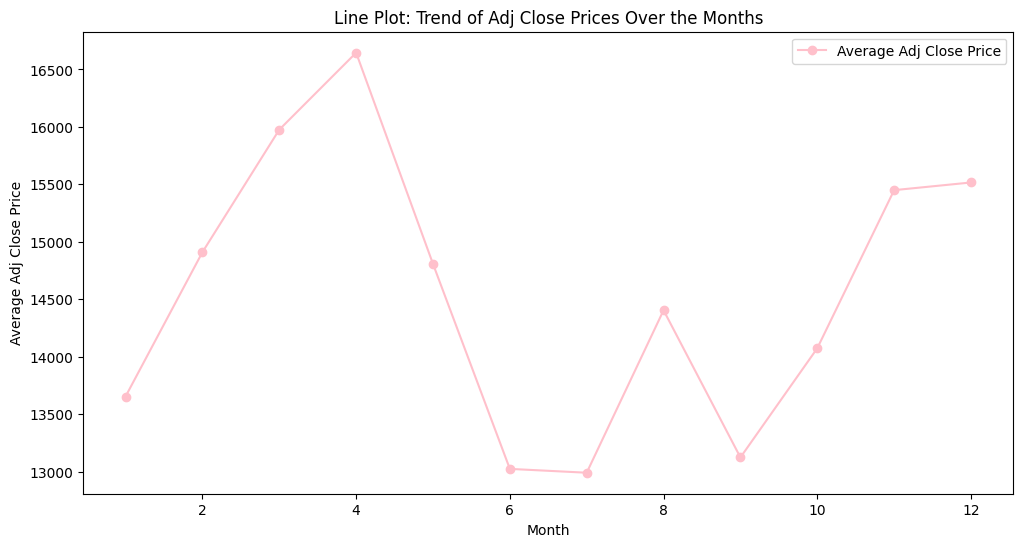

In [32]:
import matplotlib.pyplot as plt

# Line plot for the trend of 'Adj Close' prices over the months
plt.figure(figsize=(12, 6))
plt.plot(data.groupby('Month')['Adj Close'].mean(), marker='o', linestyle='-', color='pink', label='Average Adj Close Price')
plt.title('Line Plot: Trend of Adj Close Prices Over the Months')
plt.xlabel('Month')
plt.ylabel('Average Adj Close Price')
plt.legend()
plt.show()
